In [2]:
inputbucket="s3://6007.finalproject/lat_longs.txt"

In [3]:
import re
pattern="[^\d.-]+[.]{1}[^\d.]+"
repl="delete"
data = sc.textFile(inputbucket)\
.map(lambda x: x.split(" "))\
.map(lambda x: (re.sub(pattern,repl,x[0]),x[1],x[2]))\
.filter(lambda x: ("delete" not in x[0]) and (x[0]!=""))\
.map(lambda x:(float(x[0]),float(x[1]),x[2]))

In [35]:
data.take(1)

[(36.7, 3.216666666666667, '<http://dbpedia.org/resource/Algeria>')]

In [4]:
data.cache()

PythonRDD[2] at RDD at PythonRDD.scala:53

In [5]:
all_data = data.collect()
import pandas as pd
all_data = pd.DataFrame(all_data,columns=['Latitude','Longtitude','Site'])

In [6]:
all_data.head()

,Latitude,Longtitude,Site
0,36.700000,3.216667,<http://dbpedia.org/resource/Algeria>
1,42.500000,1.516667,<http://dbpedia.org/resource/Andorra>
2,12.516667,-70.033333,<http://dbpedia.org/resource/Aruba>
3,-8.833333,13.333333,<http://dbpedia.org/resource/Angola>
4,41.333333,19.800000,<http://dbpedia.org/resource/Albania>


In [7]:
#we can 'box' the us by using ranges of long/lats
lowest_us_lat=25
highest_us_lat=50
lowest_us_long=-125
highest_us_long=-65

In [8]:
us_data = all_data[(all_data.Longtitude > lowest_us_long)&(all_data.Longtitude < highest_us_long)\
                  &(all_data.Latitude > lowest_us_lat)&(all_data.Latitude < highest_us_lat)]

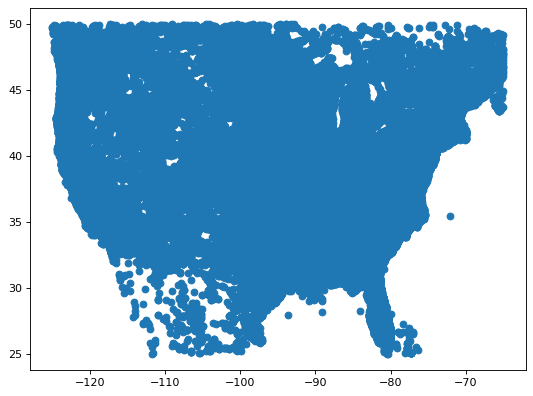

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(us_data.Longtitude,us_data.Latitude)

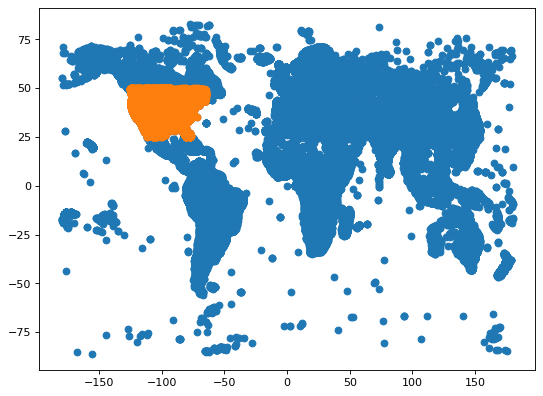

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(all_data.Longtitude,all_data.Latitude)
plt.scatter(us_data.Longtitude,us_data.Latitude)

## I don't see it necessary to plot with the great circle distance unless we plotted a 3D representation. Though a Euclidean representation of the coordinates is not the best representation since we're referring to the a circular coordinate system, we can clearly see the representations of the continents, this aligns with the common flat maps most people see. However, in terms of calculating k-means, that's when we'd need to consider a different metric of distance.